In [1]:
# Author - Dvir Sadon
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Data cleaning

In [3]:
df.info()
# No nan values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Number of accurances for each quality value'}>

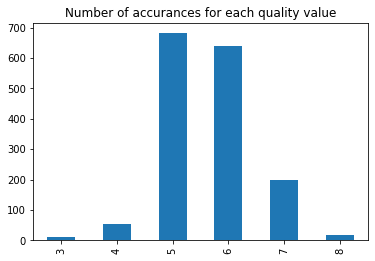

In [6]:
df['quality'].value_counts().sort_index().plot(kind='bar', title="Number of accurances for each quality value")

In [7]:
X = df.drop('quality', axis=1)
y = df['quality']

alcohol                 0.184652
volatile acidity        0.117330
sulphates               0.097678
density                 0.091708
total sulfur dioxide    0.091098
fixed acidity           0.060175
residual sugar          0.046987
citric acid             0.037847
chlorides               0.037644
pH                      0.017661
free sulfur dioxide     0.010680
Name: MI Scores, dtype: float64


<AxesSubplot:title={'center':'Mi score for each feature'}>

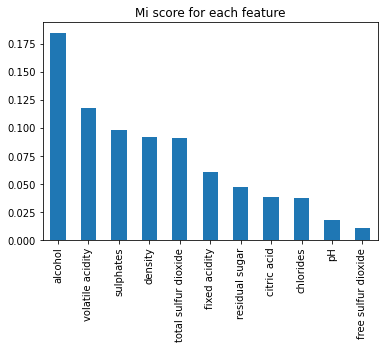

In [8]:
# Mutual information
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)
mi_scores.plot(kind='bar', title="Mi score for each feature")

Text(0.5, 1.0, 'Corraltion heatmap')

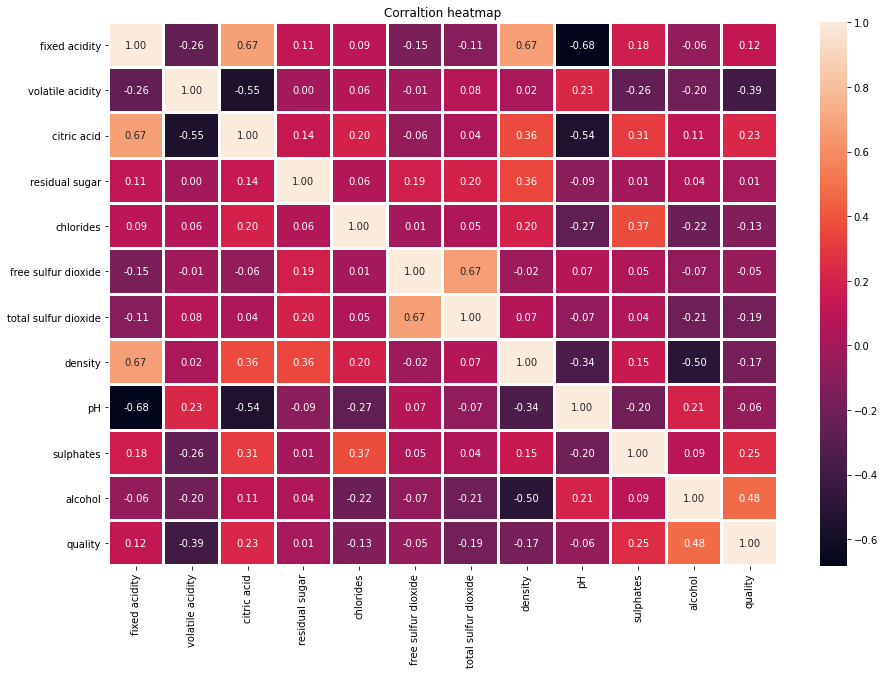

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2).set_title("Corraltion heatmap")

In [10]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

### It seems both from MI and the correlation calculation that residual sugar seems to not be very helpful to the model so we will drop it

In [11]:
X = X.drop('residual sugar', axis=1)

## Sacle and split data

In [12]:
sc = StandardScaler()
X = sc.fit_transform(X)

oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN

In [13]:
arr = np.zeros(13, dtype = float)
for j in range(10): 
    for i in range(2, 15):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)

        # Predicting
        y_pred = knn.predict(X_test)
        predict_score = metrics.accuracy_score(y_test, y_pred)
        arr[i-2] = (arr[i-2] + predict_score)/2
        # print("Accuracy:", str(i), metrics.accuracy_score(y_test, y_pred))

print(arr)

[0.82804143 0.80361543 0.80972193 0.80117283 0.78895983 0.77308293
 0.76819773 0.76331253 0.76086993 0.75354213 0.75476343 0.74987823
 0.75109953]


<BarContainer object of 13 artists>

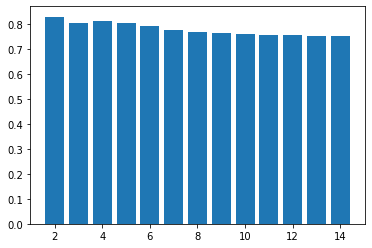

In [14]:
plt.bar(range(2, 15), arr)

## Decision Tree 

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8166259168704156
              precision    recall  f1-score   support

           3       0.93      0.98      0.95       136
           4       0.87      0.88      0.88       136
           5       0.76      0.62      0.68       136
           6       0.60      0.65      0.63       133
           7       0.79      0.81      0.80       130
           8       0.93      0.95      0.94       147

    accuracy                           0.82       818
   macro avg       0.81      0.81      0.81       818
weighted avg       0.82      0.82      0.82       818



### F1 score – What percent of positive predictions were correct? 
### Precision – What percent of your predictions were correct? 
###  Recall – What percent of the positive cases did you catch? 

## Random Forest

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8789731051344744
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       136
           4       0.92      0.98      0.95       136
           5       0.78      0.74      0.76       136
           6       0.70      0.62      0.66       133
           7       0.90      0.92      0.91       130
           8       0.97      1.00      0.98       147

    accuracy                           0.88       818
   macro avg       0.87      0.88      0.87       818
weighted avg       0.87      0.88      0.88       818



## AdaBoost

5
0.3924205378973105


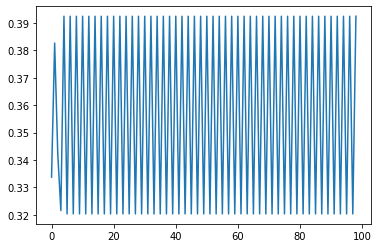

In [17]:
avg = []
maxi = 0
mymax = 0
for i in range (1, 100):
    abc = AdaBoostClassifier(n_estimators=i, random_state=0)  # DecisionTreeClassifier 
    abc.fit(X_train, y_train)

    y_pred = abc.predict(X_test)
    predict_score = metrics.accuracy_score(y_test, y_pred)
    if(predict_score > mymax):
         mymax = predict_score
         maxi = i

    avg.append(predict_score)
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.plot(range(len(avg)), avg)
print(maxi)
print(mymax)

To summarize, I was able to upgrade the models by removing "residual sugar" and scaling the data but SMOTE upgraded the model from about 70% accuracy to about 88% accuracy.